In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
!pip install plotly
import plotly.offline as py
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf

In [3]:
"""# Loading Dataset"""
dataset = pd.read_csv('final_data.csv')
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [4]:
dataset.describe()

,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [6]:
dataset.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

In [7]:
dataset.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [8]:
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,1,0,0,0,0,0,0,0,0,0,0
5048,27,27,27,1,0,0,0,0,0,0,0,0,0,0
5049,28,28,28,1,0,0,0,0,0,0,0,0,0,0
5050,29,29,29,1,0,0,0,0,0,0,0,0,0,0


In [9]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
2,144,249,131,0,1,0,0,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
4,30,182,136,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,0,0,0,0,0,0,0,0,0,1,0
5048,27,27,27,0,0,0,0,0,0,0,0,0,1,0
5049,28,28,28,0,0,0,0,0,0,0,0,0,1,0
5050,29,29,29,0,0,0,0,0,0,0,0,0,1,0


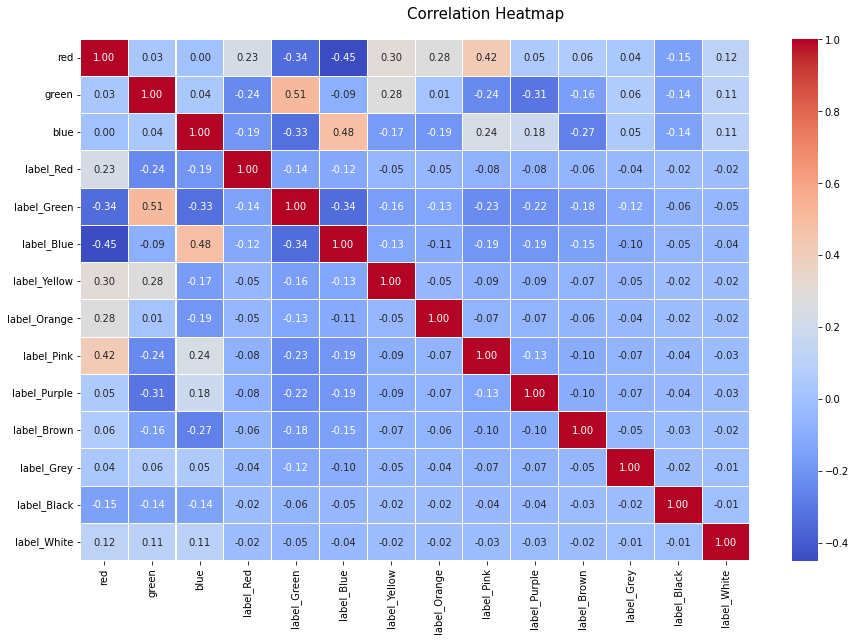

In [10]:
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

In [11]:
train_dataset = dataset.sample(frac=0.8, random_state=9)

In [12]:
test_dataset = dataset.drop(train_dataset.index)

In [13]:
train_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4232,243,2,187,0,0,0,0,0,1,0,0,0,0,0
4898,200,89,0,0,0,0,0,1,0,0,0,0,0,0
1959,147,118,80,0,0,0,0,0,0,0,1,0,0,0
3477,30,103,73,0,1,0,0,0,0,0,0,0,0,0
4167,222,205,78,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,42,8,85,0,0,1,0,0,0,0,0,0,0,0
2610,162,159,216,0,0,1,0,0,0,0,0,0,0,0
1739,138,48,233,0,0,0,0,0,0,1,0,0,0,0
3033,9,46,248,0,0,1,0,0,0,0,0,0,0,0


In [14]:
test_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
11,249,99,108,0,0,0,0,0,1,0,0,0,0,0
12,24,161,177,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,18,18,18,0,0,0,0,0,0,0,0,0,1,0
5040,19,19,19,0,0,0,0,0,0,0,0,0,1,0
5042,21,21,21,0,0,0,0,0,0,0,0,0,1,0
5048,27,27,27,0,0,0,0,0,0,0,0,0,1,0


In [15]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T

In [16]:
train_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4232,0,0,0,0,0,1,0,0,0,0,0
4898,0,0,0,0,1,0,0,0,0,0,0
1959,0,0,0,0,0,0,0,1,0,0,0
3477,0,1,0,0,0,0,0,0,0,0,0
4167,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2414,0,0,1,0,0,0,0,0,0,0,0
2610,0,0,1,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,1,0,0,0,0
3033,0,0,1,0,0,0,0,0,0,0,0


In [17]:
train_dataset

,red,green,blue
4232,243,2,187
4898,200,89,0
1959,147,118,80
3477,30,103,73
4167,222,205,78
...,...,...,...
2414,42,8,85
2610,162,159,216
1739,138,48,233
3033,9,46,248


In [18]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5039,0,0,0,0,0,0,0,0,0,1,0
5040,0,0,0,0,0,0,0,0,0,1,0
5042,0,0,0,0,0,0,0,0,0,1,0
5048,0,0,0,0,0,0,0,0,0,1,0


In [19]:
test_dataset

,red,green,blue
0,20,139,240
1,174,83,72
3,168,25,156
11,249,99,108
12,24,161,177
...,...,...,...
5039,18,18,18
5040,19,19,19
5042,21,21,21
5048,27,27,27


In [20]:

from keras import regularizers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

In [22]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [23]:
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [24]:
model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 11)                275       
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [27]:
!pip install -q git+https://github.com/tensorflow/docs


In [28]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [29]:
history = model.fit(x=train_dataset, y=train_labels, 
                    validation_split=0.3, 
                    epochs=10001, 
                    batch_size=48, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()], 
                    shuffle=True)



Epoch: 0, accuracy:0.2527,  loss:55.2222,  val_accuracy:0.3265,  val_loss:30.0881,  
....................................................................................................
Epoch: 100, accuracy:0.8381,  loss:0.4217,  val_accuracy:0.8293,  val_loss:0.4687,  
....................................................................................................
Epoch: 200, accuracy:0.8639,  loss:0.3533,  val_accuracy:0.8392,  val_loss:0.3955,  
....................................................................................................
Epoch: 300, accuracy:0.8678,  loss:0.3250,  val_accuracy:0.8491,  val_loss:0.3814,  
....................................................................................................
Epoch: 400, accuracy:0.8791,  loss:0.3089,  val_accuracy:0.8491,  val_loss:0.3860,  
....................................................................................................
Epoch: 500, accuracy:0.8830,  loss:0.2974,  val_accuracy:0.8516,  val

In [ ]:
#!pip install strip-hints

In [ ]:
#!python --version

Python 3.7.13


In [ ]:
#!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python 3.9.6

In [ ]:
#!sudo update-alternatives --config python3

In [ ]:
#!sudo apt install python3.9-pip

In [ ]:
#!sudo ln -s /usr/bin/python3 /usr/bin/python
#!sudo apt install -y python3.9.6-pip
#!sudo ln -s /usr/bin/pip3 /usr/bin/pip
# Confirm the new version of Python: 3
#!python --version

In [30]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
9996,0.271329,0.893248,0.420926,0.860676,9996
9997,0.268723,0.889007,0.411548,0.858203,9997
9998,0.275272,0.887239,0.413045,0.863974,9998
9999,0.271076,0.885825,0.408961,0.860676,9999
10000,0.269361,0.889714,0.404477,0.857378,10000


In [31]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'accuracy [Color]')

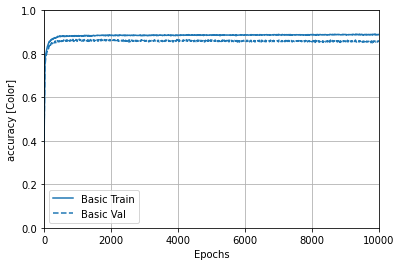

In [32]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

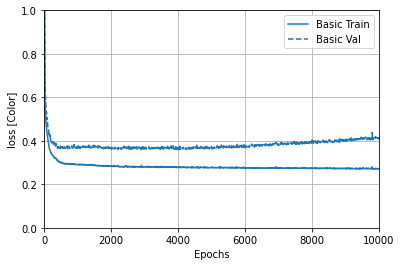

In [33]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
model.save('colormodel_acu_89.h5')
#model_file = drive.CreateFile({'title' : 'colormodel_acu_89.h5'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive                   

In [ ]:
          
model_file.SetContentFile('colormodel_acu_89.h5')                       
model_file.Upload()

In [ ]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1KIRaTeaw-BHT_5K2W4dCau7SuLA8TfNz'})

In [ ]:
file_obj = drive.CreateFile({'id': '1KIRaTeaw-BHT_5K2W4dCau7SuLA8TfNz'})                       
file_obj.GetContentFile('colormodel_trained_89.h5')

In [ ]:
ls

colormodel_acu_89.h5  colormodel_trained_89.h5  final_data.csv  sample_data/


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 11)                275       
                                                                 
Total params: 383
Trainable params: 383
Non-trainable params: 0
_________________________________________________________________


In [36]:
train_predictions = model.predict(train_dataset)
train_predictions

array([[    2.6569262,   -50.660248 ,  -325.67426  , ...,   -36.537777 ,
         -165.65784  ,  -141.57814  ],
       [    3.7536137,   -23.135506 ,  -663.49664  , ...,  -164.47176  ,
        -1135.0061   ,  -180.23271  ],
       [   -7.6545186,    -3.6777296,  -152.21796  , ...,    -3.4123425,
         -531.4441   ,   -54.49654  ],
       ...,
       [  -36.303284 ,   -30.31657  ,     4.516916 , ...,   -74.18366  ,
          -22.023249 ,   -45.727158 ],
       [ -152.08011  ,   -14.483363 ,    23.305187 , ...,  -321.31607  ,
          -39.10546  ,   -55.42498  ],
       [ -489.0146   ,     6.024455 ,     9.998241 , ...,     1.3018689,
         -362.6016   ,   -36.16791  ]], dtype=float32)

In [37]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

array([5, 4, 7, ..., 6, 2, 2])

In [38]:
predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

array([5, 4, 7, ..., 6, 2, 2])

In [39]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

,Labels
0,5
1,4
2,7
3,1
4,3
...,...
4037,2
4038,2
4039,6
4040,2


In [40]:
predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

,Labels
0,5
1,4
2,7
3,1
4,3
...,...
4037,2
4038,2
4039,6
4040,2


In [41]:
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

In [42]:
test_predictions = model.predict(test_dataset)
test_predictions

array([[-8.5979141e+01, -2.3706388e+00,  1.8034016e+01, ...,
        -1.4189716e+02, -3.0085918e+01, -3.5598095e+01],
       [ 8.1848395e-01, -1.4120952e+01, -3.0591904e+02, ...,
        -1.5010936e+01, -5.9290979e+02, -1.0575071e+02],
       [-9.7303081e-01, -3.3540798e+01, -1.3558072e+02, ...,
        -2.0185066e+01, -6.4108177e+01, -7.6040634e+01],
       ...,
       [-3.2298954e+01, -1.6742463e+00, -4.6977943e+01, ...,
        -6.8794655e+01,  1.5585598e+01, -3.2146446e+01],
       [-2.2046476e+01,  8.6484194e-02, -3.0513977e+01, ...,
        -3.2124783e+01,  1.3110707e+01, -2.8576653e+01],
       [-2.0337727e+01,  3.7993968e-01, -2.7769989e+01, ...,
        -2.6013126e+01,  1.2698223e+01, -2.7981689e+01]], dtype=float32)

In [43]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1) 
actual_encoded_test_labels

array([2, 7, 5, ..., 9, 9, 9])

In [44]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([2, 7, 6, ..., 9, 9, 9])

In [45]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

,Labels
0,2
1,7
2,5
3,5
4,2
...,...
1005,9
1006,9
1007,9
1008,9


In [46]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels

,Labels
0,2
1,7
2,6
3,0
4,2
...,...
1005,9
1006,9
1007,9
1008,9


In [47]:
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

In [48]:
model.evaluate(x=train_dataset, y=train_labels)

127/127 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8825


[0.30484265089035034, 0.8824838995933533]

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

array([[ 149,    0,    0,    0,   13,   19,    0,   11,    0,    0,    0],
       [   0, 1091,   39,   19,    0,    1,    0,    8,   10,    0,    0],
       [   0,   16,  820,    0,    0,    0,   19,    0,    7,    3,    0],
       [   0,   25,    0,  185,   15,    0,    0,    4,    0,    0,    0],
       [  12,    0,    0,    4,  147,    1,    0,    6,    0,    0,    0],
       [  15,    0,    0,    0,    0,  399,   43,    5,    0,    0,    0],
       [   1,    0,   31,    0,    0,   47,  356,    6,    6,    0,    0],
       [   9,    1,    0,    6,   14,    3,    7,  261,    3,    1,    0],
       [   0,    9,   13,    1,    0,    1,    7,    6,  105,    0,    1],
       [   0,    0,    1,    0,    0,    0,    1,    0,    1,   36,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    3,    0,   18]])

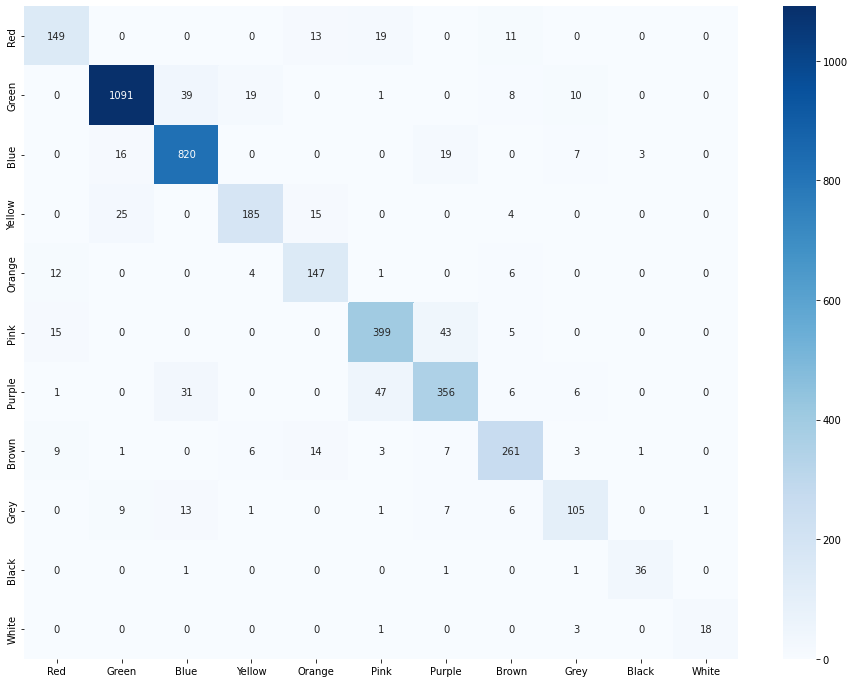

In [50]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [51]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.80      0.78      0.79       192
       Green       0.96      0.93      0.94      1168
        Blue       0.91      0.95      0.93       865
      Yellow       0.86      0.81      0.83       229
      Orange       0.78      0.86      0.82       170
        Pink       0.85      0.86      0.85       462
      Purple       0.82      0.80      0.81       447
       Brown       0.85      0.86      0.85       305
        Grey       0.78      0.73      0.76       143
       Black       0.90      0.92      0.91        39
       White       0.95      0.82      0.88        22

    accuracy                           0.88      4042
   macro avg       0.86      0.85      0.85      4042
weighted avg       0.88      0.88      0.88      4042



32/32 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8792


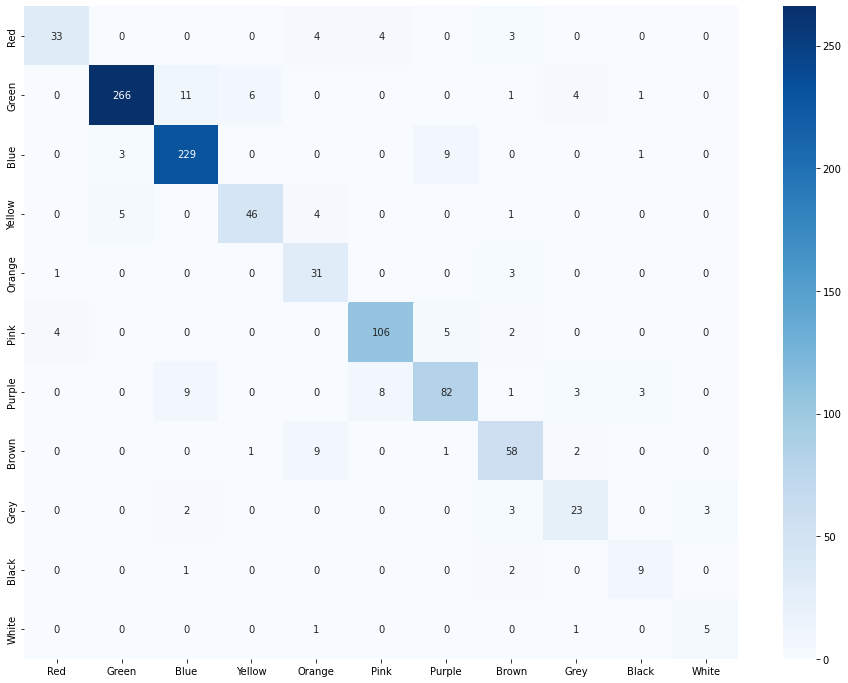

              precision    recall  f1-score   support

         Red       0.87      0.75      0.80        44
       Green       0.97      0.92      0.94       289
        Blue       0.91      0.95      0.93       242
      Yellow       0.87      0.82      0.84        56
      Orange       0.63      0.89      0.74        35
        Pink       0.90      0.91      0.90       117
      Purple       0.85      0.77      0.81       106
       Brown       0.78      0.82      0.80        71
        Grey       0.70      0.74      0.72        31
       Black       0.64      0.75      0.69        12
       White       0.62      0.71      0.67         7

    accuracy                           0.88      1010
   macro avg       0.79      0.82      0.80      1010
weighted avg       0.88      0.88      0.88      1010



In [52]:
model.evaluate(x=test_dataset, y=test_labels)

confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))

In [ ]:
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=ff27b0d22b8493e900083bd912408b3235edcf9b176f4bd0dba911e23a012b16
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz;
model.load_weights("colormodel_trained_89.h5")
ann_viz(model, title="Artificial Neural network - RGB Color Classifier Model Visualization")

# New Section